# Ensemble Methods

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Data

x1,x2
3,5


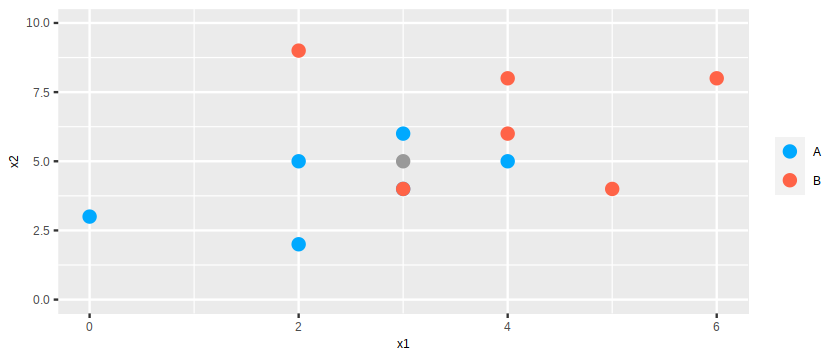

In [2]:
data = data.frame(x1=c(0,2,3,4,3,2,4,2,3,4,5,6), x2=c(3,2,6,5,4,5,8,9,4,6,4,8),
                  class=c("A","A","A","A","A","A","B","B","B","B","B","B"))
new = data.frame(x1=3, x2=5)
new

ggplot(data) + ylim(0,10) +
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR)

## Problem 1

See below three bootstrap samples from the dataset.  Use bootstrap aggregating (bagging) on the naive Bayes method with these three samples to build models and predict the new observation's class, assuming cutoff for A is 0.5.  Also, show the probabilities calculated by each of the models for the new observation.  Also, show the predictions made by each of the models for the new observation.

You may want to use these function(s):
* naivebayes()
* predict()
* as.class()
* vote()

In [3]:
set.seed(12345)
data.1 = sample_n(data, nrow(data), replace=TRUE)
data.2 = sample_n(data, nrow(data), replace=TRUE)
data.3 = sample_n(data, nrow(data), replace=TRUE)

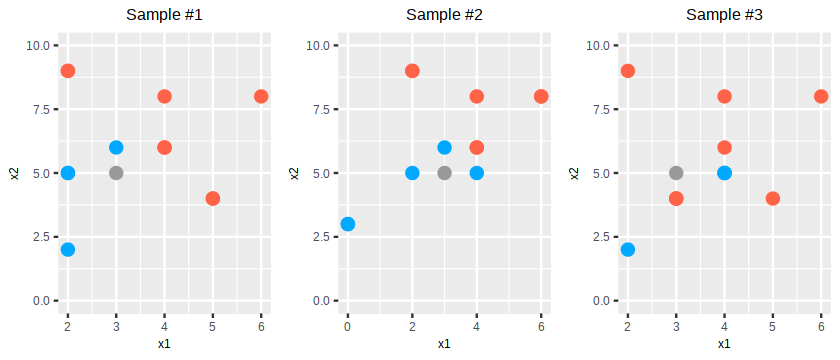

In [4]:
grid.arrange(ggplot(data.1) + ggtitle("Sample #1") + ylim(0,10) +
             geom_point(aes(x=x1, y=x2, color=class)) +
             geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) +
             theme.no_legend,
             
             ggplot(data.2) + ggtitle("Sample #2") + ylim(0,10) +
             geom_point(aes(x=x1, y=x2, color=class)) +
             geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) +
             theme.no_legend,
             
             ggplot(data.3) + ggtitle("Sample #3") + ylim(0,10) +
             geom_point(aes(x=x1, y=x2, color=class)) +
             geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) +
             theme.no_legend,
            
             nrow=1)

In [5]:
model1 = naiveBayes(class~x1+x2, data.1, laplace=TRUE)
prob1 = predict(model1, new, type = "raw")
class.predicted.1 = as.class(prob1, "A", 0.5)
prob1

model2 = naiveBayes(class~x1+x2, data.2, laplace=TRUE)
prob2 = predict(model2, new, type = "raw")
class.predicted.2 = as.class(prob2, "A", 0.5)
prob2

model3 = naiveBayes(class ~ x1+x2, data.3, laplace=TRUE)
prob3 = predict(model3, new, type = "raw")
class.predicted.3 = as.class(prob3, "A", 0.5)
prob3


A,B
0.4907981,0.5092019


A,B
0.8469818,0.1530182


A,B
0.4814371,0.5185629


In [6]:
data.frame(as.data.frame(class.predicted.1), as.data.frame(class.predicted.2), as.data.frame(class.predicted.3))

class.predicted.1,class.predicted.2,class.predicted.3
B,A,B


In [7]:
#therefore mode of the predictions is the logical choice
data.frame(class.predicted=vote(class.predicted.1, class.predicted.2, class.predicted.3))

class.predicted
B


## Problem 2

Use two levels of boosting on the support vector machine method to build models and predict the new observation's class, assuming cutoff for A is 0.5.  Also, show the insample performance of the 1st and 2nd models (each as a dataframe with a column for hits).  Also, show the training data for the 2nd and 3rd models (each as a dataframe).  Also, show the probabilities calculated by each of the models for the new observation.  Also, show the predictions made by each of the models for the new observation.

You may want to use these function(s):
* set.seed()
* svm()
* attr()
* predict()
* as.class()
* focus_data()
* vote()

Use `svm(..., ..., type="C-classification", kernel="polynomial", degree=2, cost=100, scale=TRUE, probability=TRUE)` to construct the models - precede it (each time you use it) with `set.seed(12345)`.<br>
Use `focus_data(..., ..., emphasis=10)` to determine training data for the 2nd and 3rd models - precede it (each time you use it) with `set.seed(12345)`.

In [10]:
set.seed(12345)
model.1 = svm(class~ x1+ x2, data, type="C-classification", kernel="polynomial", degree=2, cost=100, scale=TRUE, probability=TRUE)
prob = predict(model.1, data, probability=TRUE)
prob.1 = attr(prob, "probabilities")
class.predicted.1 = as.class(prob.1, "A", cutoff=0.5) 
hit.1 = class.predicted.1 == data$class
result.1 = data.frame(data, class.predicted.1, hit.1)
result.1

x1,x2,class,class.predicted.1,hit.1
0,3,A,B,FALSE
2,2,A,B,FALSE
3,6,A,B,FALSE
4,5,A,B,FALSE
3,4,A,B,FALSE
2,5,A,B,FALSE
4,8,B,B,TRUE
2,9,B,A,FALSE
3,4,B,B,TRUE
4,6,B,B,TRUE


In [11]:
set.seed(12345)
data.2 = focus_data(data, hit.1, emphasis=10)
data.2

,x1,x2,class
8,2,9,B
4,4,5,A
8.1,2,9,B
4.1,4,5,A
1,0,3,A
5,3,4,A
2,2,2,A
3,3,6,A
8.2,2,9,B
9,3,4,B


In [19]:
set.seed(12345)
model.2 = svm(class ~ x1+x2, data.2, type="C-classification", kernel="polynomial", degree=2, cost=100, scale=TRUE, probability=TRUE)

In [ ]:
prob.2 = predict(model.2, data.2, type="prob")
class.predicted.2 = as.class(prob.2, "A", cutoff=0.5)
hit.2 = class.predicted.2 == data.2$class

result.2 = data.frame(data.2, class.predicted.2, hit.2)
fmt(head(result.2, 10), "first few observations of data.2", TRUE)

In [23]:
prob.2 = attr(predict(model.2, data.2,  probability=TRUE), "probabilities")
class.predicted.2 = as.class(prob.2, "A", cutoff=0.5) 
hit.2 = class.predicted.2 == data.2$class
result.2 = data.frame(data.2, class.predicted.2, hit.2)
result.2

,x1,x2,class,class.predicted.2,hit.2
8,2,9,B,B,TRUE
4,4,5,A,A,TRUE
8.1,2,9,B,B,TRUE
4.1,4,5,A,A,TRUE
1,0,3,A,A,TRUE
5,3,4,A,A,TRUE
2,2,2,A,A,TRUE
3,3,6,A,A,TRUE
8.2,2,9,B,B,TRUE
9,3,4,B,A,FALSE


In [24]:
set.seed(12345)
data.3 = focus_data(data.2, hit.2, emphasis=10)
data.3

,x1,x2,class
4.1,4,5,A
6,2,5,A
4.1.1,4,5,A
6.1,2,5,A
9,3,4,B
9.1,3,4,B
9.2,3,4,B
8.1,2,9,B
4.1.2,4,5,A
8,2,9,B


In [25]:
set.seed(12345)
model.3 = svm(class ~ x1+x2, data.3, type="C-classification", kernel="polynomial", degree=2, cost=100, scale=TRUE, probability=TRUE)

In [26]:
#rename these variables
class.predicted_1 = predict(model.1, new, probability=TRUE)
prob.1.ratio = attr(class.predicted_1, "probabilities")
prob.1.ratio
class.predicted_1

class.predicted_2= predict(model.2, new, probability=TRUE)
prob.2.ratio = attr(class.predicted_2, "probabilities")
prob.2.ratio
class.predicted_2

class.predicted_3=predict(model.3, new, probability=TRUE)
prob.3.ratio = attr(class.predicted_3, "probabilities")
prob.3.ratio
class.predicted_3

A,B
0.3846293,0.6153707


1 
B 
attr(,"probabilities")
          A         B
1 0.3846293 0.6153707
Levels: A B

B,A
0.1608187,0.8391813


1 
A 
attr(,"probabilities")
          B         A
1 0.1608187 0.8391813
Levels: A B

A,B
0.2058604,0.7941396


1 
B 
attr(,"probabilities")
          A         B
1 0.2058604 0.7941396
Levels: A B

In [27]:
data.frame(as.data.frame(class.predicted_1), as.data.frame(class.predicted_2), as.data.frame(class.predicted_3))



class.predicted_1,class.predicted_2,class.predicted_3
B,A,B


In [28]:
# therefore the most logical option is the mode of the three options.
data.frame(class.predicted=vote(class.predicted_1, class.predicted_2, class.predicted_3))

class.predicted
B


## Problem 3

Use stacking on the naive Bayes method over three support vector machine methods to build a model and predict the new observation's class, assuming cutoff for A is 0.5.

Hyper-parameters for the support vector machine methods:
* For Model #1: _type="C-classification", kernel="polynomial", degree=2, cost=1, scale=TRUE, probability=TRUE_
* For Model #2: _type="C-classification", kernel="polynomial", degree=3, cost=100, scale=TRUE, probability=TRUE_
* For Model #3: _type="C-classification", kernel="radial", gamma=1, cost=100, scale=TRUE, probability=TRUE_

Show the dataset and new observation expressed in terms of the new variables.  Show the probabilities calculated by the naive Bayes model for the new observation.

You may want to use these function(s):
* set.seed()
* svm()
* attr()
* predict()
* as.class()
* naiveBayes()

Use `svm(...)` to construct the support vector machine models - precede it (each time you use it) with `set.seed(12345)`.

Construct a new dataset.  Each observation in the new dataset corresponds to an observation in the original dataset.  The variables are predictions from the 3 models and the actual class.

In [29]:
set.seed(12345)
model.01 = svm(class~x1+x2, data, type="C-classification", kernel="polynomial", degree=2, cost=1, scale=TRUE, probability=TRUE)

In [30]:
set.seed(12345)
model.02 = svm(class~x1+x2, data, type="C-classification", kernel="polynomial", degree=3, cost=100, scale=TRUE, probability=TRUE)

In [31]:
set.seed(12345)
model.03 = svm(class~x1+x2, data, type="C-classification", kernel="radial", gamma=1, cost=100, scale=TRUE, probability=TRUE)

In [43]:
prob.01 = attr(predict(model.01, data, probability=TRUE), "probabilities")
class.predicted.1 = as.class(prob.01, "A", cutoff=0.5)

prob.02 = attr(predict(model.02, data, probability=TRUE), "probabilities")
class.predicted.2 = as.class(prob.02, "A", cutoff=0.5)

prob.03 = attr(predict(model.03, data, probability=TRUE), "probabilities")
class.predicted.3 = as.class(prob.03, "A", cutoff=0.5) 

data.frame(data[, 1:2], class.predicted.1, class.predicted.2, class.predicted.3, class=data[,3])

data.stack = data.frame(class.predicted.1, class.predicted.2, class.predicted.3,
                        class=data$class)

x1,x2,class.predicted.1,class.predicted.2,class.predicted.3,class
0,3,B,A,B,A
2,2,B,A,B,A
3,6,B,B,B,A
4,5,B,B,B,A
3,4,B,B,B,A
2,5,B,B,B,A
4,8,B,B,A,B
2,9,A,B,A,B
3,4,B,B,B,B
4,6,B,B,A,B


In [45]:
prob.A = attr(predict(model.01, new, probability=TRUE), "probabilities")
class.predicted.1 = as.class(prob.A, "A", cutoff=0.5)

prob.B = attr(predict(model.02, new, probability=TRUE), "probabilities")
class.predicted.2 = as.class(prob.B, "A", cutoff=0.5)

prob.C = attr(predict(model.03, new, probability=TRUE), "probabilities")
class.predicted.3 = as.class(prob.C, "A", cutoff=0.5) 

data.frame(new[, 1:2], class.predicted.1, class.predicted.2, class.predicted.3)
new.stack = data.frame(class.predicted.1, class.predicted.2, class.predicted.3)

x1,x2,class.predicted.1,class.predicted.2,class.predicted.3
3,5,B,B,B


In [49]:
#Show the probabilities calculated by the naive Bayes model for the new observation.


model.stack = naiveBayes(class ~ class.predicted.1+class.predicted.2+class.predicted.3, data.stack)

final_prob = predict(model.stack, new.stack, type="raw")
final_prob

A,B
0.8275862,0.1724138


In [52]:
class.predicted = as.class(final_prob, "A", 0.5)
as.data.frame(class.predicted)

class.predicted
A


<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised April 20, 2020
</span>
</p>
</font>